In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#notebook setting to display all the rowns and columns to have better clearity on the data.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
# Importing bike rental data 
bike = pd.read_csv('day.csv')

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<h1>Inference:</h1>
           1.From the dataset, its clearly visible that all features have 730 non-null values and there are 16 such features.                cnt is the target variable. Next thing to focus is which features will be relevant for our model and which ones to              remove.
           2.Instant and dteday are the columns which can be dropped as mnth,yr,weekday are there already and instant field is                not a relevant field for our model  
           3.Holiday feature can also be dropped because workingday feature explains the exact same thing.

In [8]:
# dropping the columns
bike = bike.drop(['instant','dteday','holiday'],axis = 1)
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Time to Visualize the data set and make inferences!!

<h3>Numerical Features</h3>

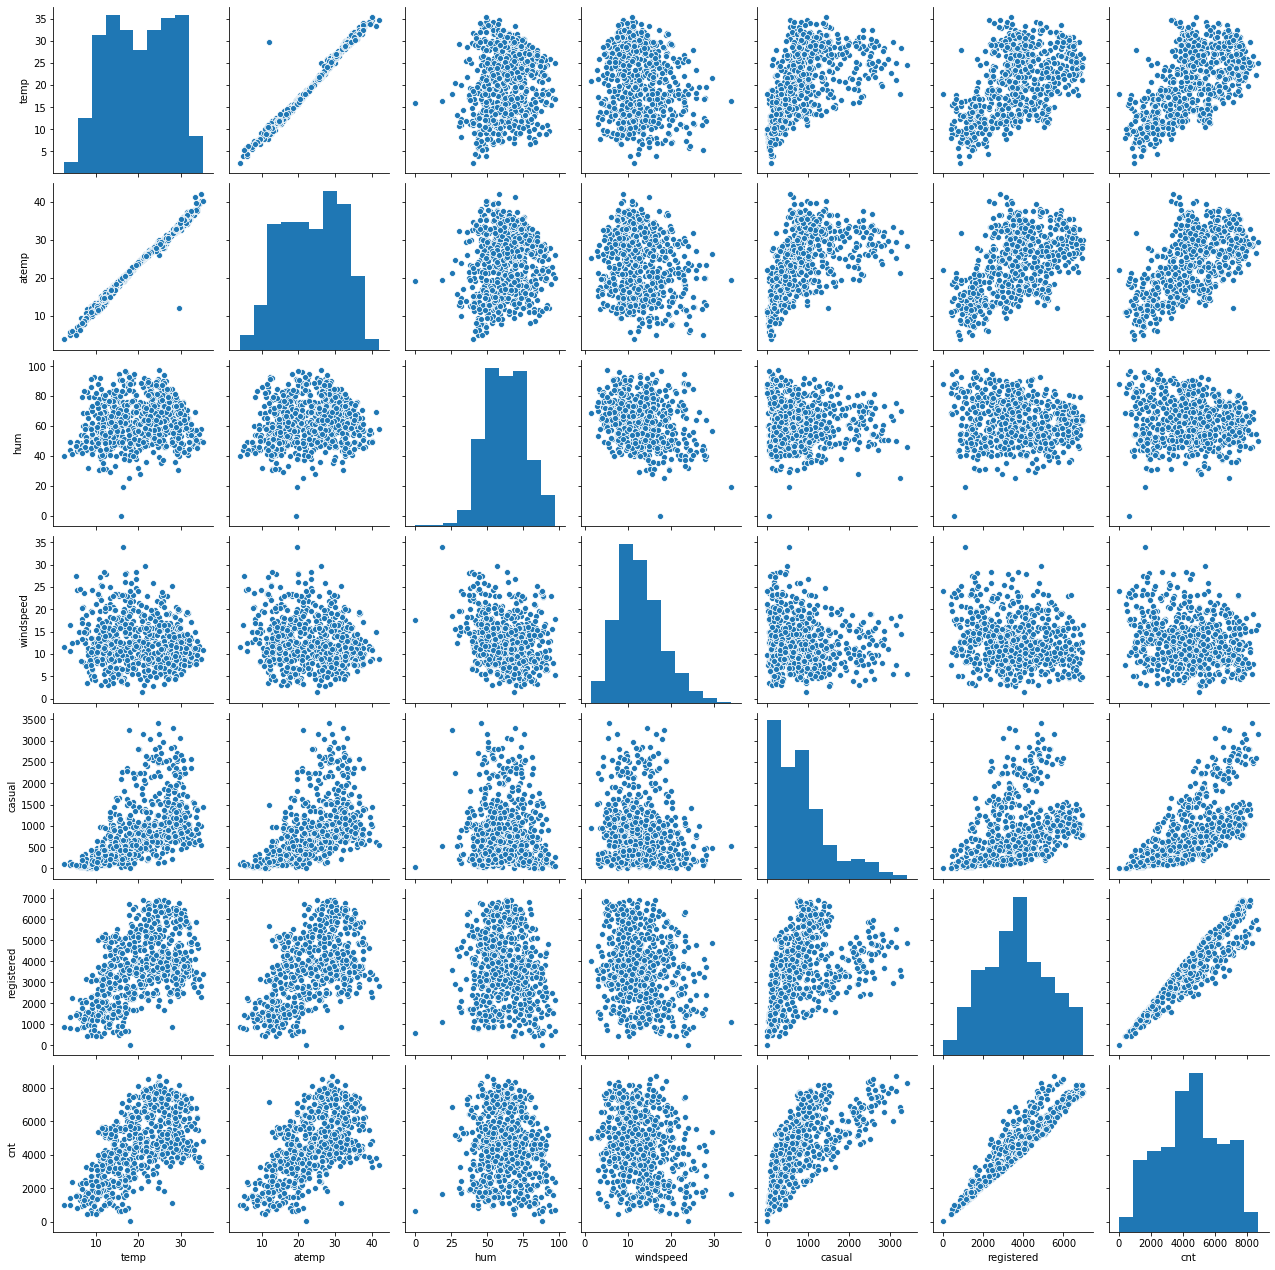

In [9]:
# For Numeric Variables
Numcol = ['temp','atemp','hum','windspeed','casual','registered','cnt']
sns.pairplot(bike[Numcol])
plt.show()

<h1>Inference:</h1>
1. When Comparing cnt, temp, atemp, casual and registered show linear increase. While, hum and windspeed has datapoints scattered.</br>
2. temp and atemp are highly corellated which can lead to multicollinearity.</br>
3. cnt is highly corellated with registered.


In [10]:
bike.season = bike.season.astype(str)
bike.weathersit = bike.weathersit.astype(str)
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

<h3>Categorical Features</h3>

In [11]:
def season_map(x):
    if x=='1':
        return 'spring'
    elif x=='2':
        return 'summer'
    elif x=='3':
        return 'fall'
    else:
        return 'winter'

In [12]:
def weathersit_map(x):
    if x=='1':
        return 'Clear'
    elif x=='2':
        return 'Mist'
    elif x=='3':
        return 'Light Snow'
    else:
        return 'Heavy Rain'

In [13]:
# Categorical Variables mapping
bike['season'] = bike['season'].apply(season_map)
bike['weathersit'] = bike['weathersit'].apply(weathersit_map)
mnth = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['mnth'] = bike['mnth'].map(mnth)
yr = {0:2018, 1:2019}
bike['yr'] = bike['yr'].map(yr)
weekday = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}
bike['weekday'] = bike['weekday'].map(weekday)
workingday = {1:'Working',0:'Holiday'}
bike['workingday'] = bike['workingday'].map(workingday)
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,Mon,Working,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,Tue,Working,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,Wed,Working,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,Thu,Working,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,Fri,Working,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


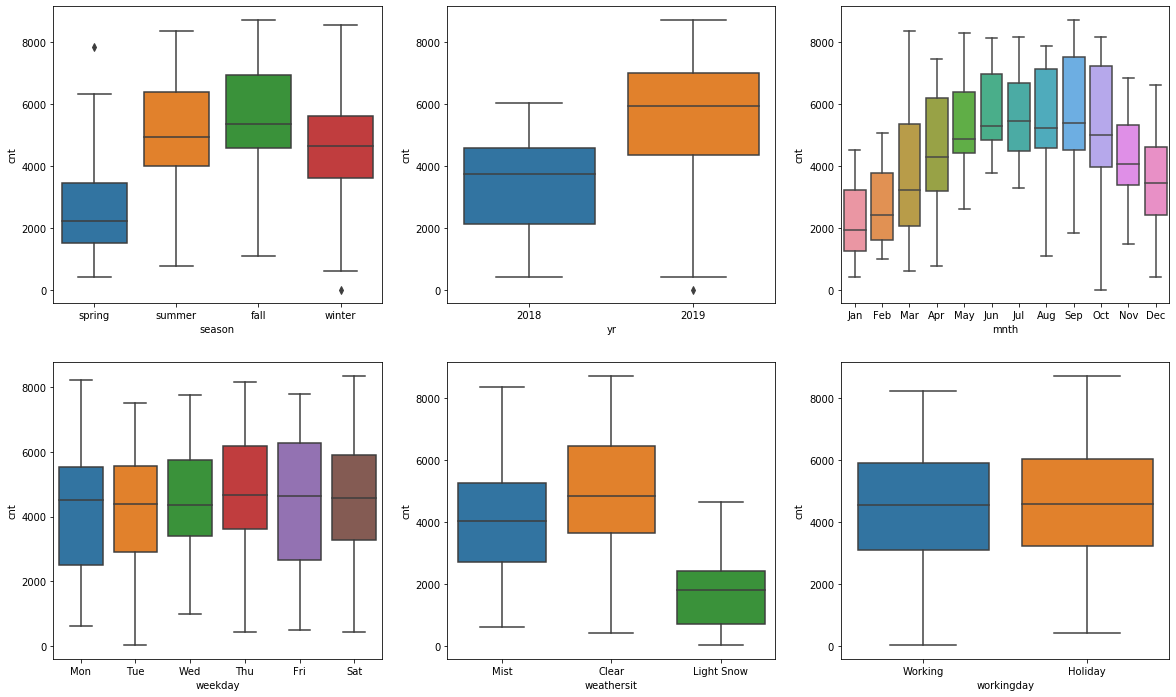

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt',data=bike)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt',data=bike)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt',data=bike)
plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt',data=bike)
plt.subplot(2,3,5)
sns.boxplot(x='weathersit', y='cnt',data=bike)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt',data=bike)
plt.show()

<h1>Inference:</h1> 
1. People prefer to rent bikes more on clear and mist when compared to light snow as Clear has 50% value between 4k and 6K and Mist has 4k.
2. More bikes were rented in the year of 2019.
3. It dosen't matter if its a working day or a holiday average number of bikes rented ar same. Similarly for weekday average no. of bikes rented have no much of difference. 
4. Spring season have significantly less average no. of bikes rented. 

In [15]:
# now its time to create dummy variables for categorical variables
# yr can only have 2 values 2018 and 2019. Similar is the case for workingday i.e either 1:workingday or 0:holiday
bike['yr'].replace([2018,2019],[0,1],inplace=True)
bike['workingday'].replace(['Working','Holiday'],[1,0],inplace=True)
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
# Creating Dummy Variables
weather= pd.get_dummies(bike['weathersit'],drop_first=True)
seasons = pd.get_dummies(bike['season'],drop_first=True)
month= pd.get_dummies(bike['mnth'],drop_first=True)
week_day= pd.get_dummies(bike['weekday'],drop_first=True)

In [17]:
bike_dummy= pd.concat([bike,seasons,weather,month,week_day],axis=1)
bike_dummy.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Thu,Tue,Wed
0,spring,0,Jan,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# dropping unwanted columns
bike_dummy.drop(['weekday','weathersit','mnth','season'],axis=1,inplace=True)

In [19]:
bike_dummy.shape

(730, 30)

In [20]:
bike_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   workingday  730 non-null    int64  
 2   temp        730 non-null    float64
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   casual      730 non-null    int64  
 7   registered  730 non-null    int64  
 8   cnt         730 non-null    int64  
 9   spring      730 non-null    uint8  
 10  summer      730 non-null    uint8  
 11  winter      730 non-null    uint8  
 12  Light Snow  730 non-null    uint8  
 13  Mist        730 non-null    uint8  
 14  Aug         730 non-null    uint8  
 15  Dec         730 non-null    uint8  
 16  Feb         730 non-null    uint8  
 17  Jan         730 non-null    uint8  
 18  Jul         730 non-null    uint8  
 19  Jun         730 non-null    u

In [21]:
bike_dummy.describe()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Thu,Tue,Wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,0.246575,0.252055,0.243836,0.028767,0.336986,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.143836,0.142466
std,0.500343,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,0.431313,0.434490,0.429689,0.167266,0.473004,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.351164,0.349767
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']
bike_dummy[num_vars].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


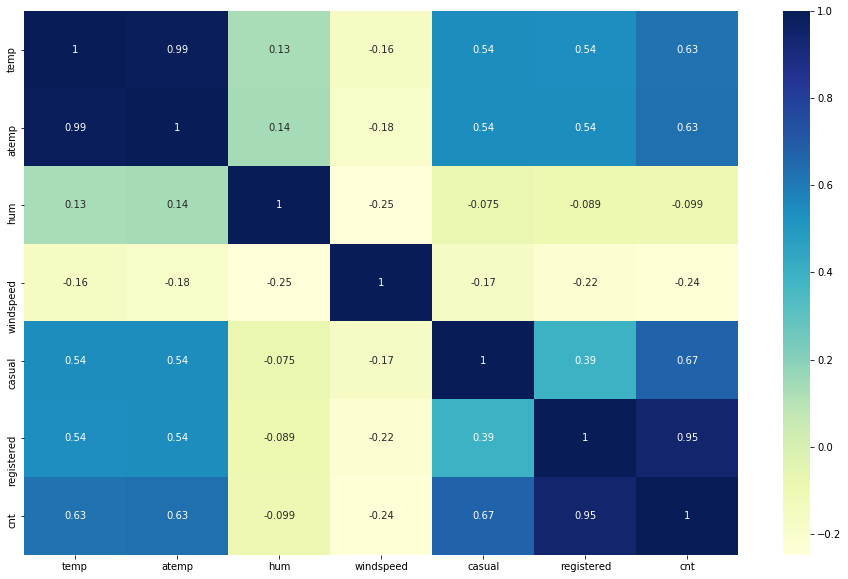

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(bike_dummy[num_vars].corr(), annot=True, cmap='YlGnBu')
plt.show()

<h1>Inference:</h1> 
From the heatmap, it is clear that atemp is highly correlated with temp and same is the case with cnt and registered. This may lead to multicollinearity. So, solution is to drop the features. 

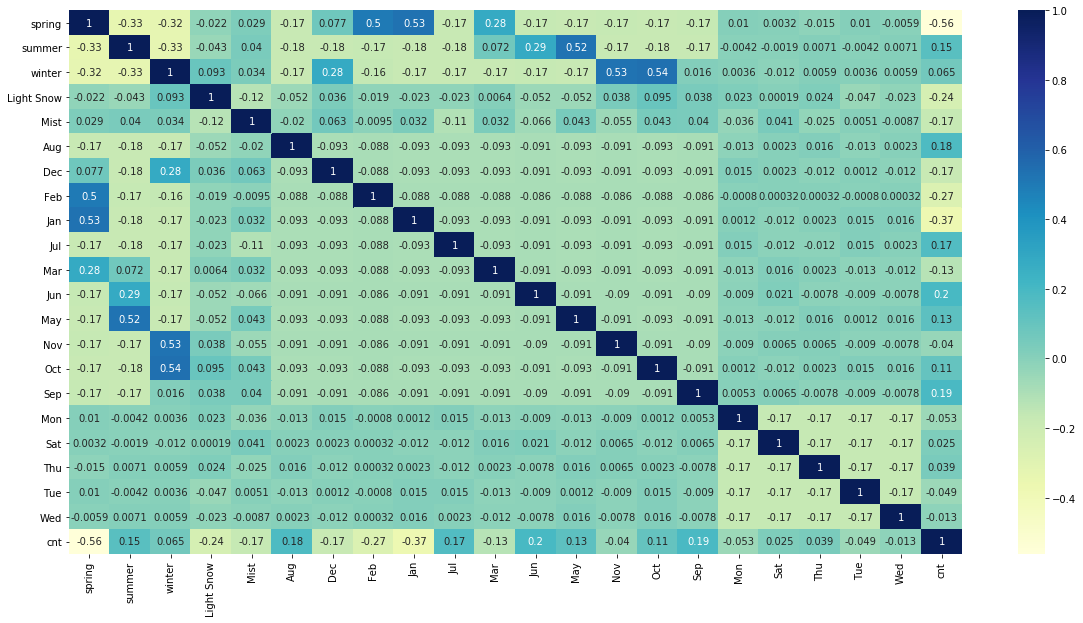

In [24]:
categorical_vars = ['spring','summer','winter','Light Snow','Mist','Aug','Dec','Feb','Jan','Jul','Mar','Jun','May',
                    'Nov','Oct','Sep','Mon','Sat','Thu','Tue','Wed','cnt']
plt.figure(figsize=(20,10))
sns.heatmap(bike_dummy[categorical_vars].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [25]:
# Dropping the features registered and atemp
bike_dummy.drop(['atemp','registered','casual'],axis=1,inplace=True)

In [26]:
bike_dummy.head()

,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Thu,Tue,Wed
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
bike_dummy.shape

(730, 27)

# Training the Model

In [28]:
bike_train, bike_test = train_test_split(bike_dummy, train_size = 0.7,  random_state = 100)

In [29]:
bike_train.shape

(510, 27)

In [30]:
bike_test.shape

(220, 27)

## Rescaling the Training data

In [31]:
# Next step will be to rescale some of the numerical values using the min-max scaling method
scaler = MinMaxScaler()

# Create list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']

# fit on data 
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])
bike_train.head()

C:\Users\hp\Python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\Python\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Thu,Tue,Wed
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Data Preparation
X_train = bike_train.drop('cnt', axis=1)
y_train = bike_train.cnt

## Recursive Feature Elimination on first 10 features

In [33]:
# Running RFE first 10 features 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
# Displaying the columns and their rankings training the model 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 16),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 17),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 15),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11)]

In [35]:
# Will take all the columns with rank 1
rfe_col = ['yr','temp','hum','windspeed','spring','winter','Light Snow','Mist','Jul','Sep']
X_train_rfe = X_train[rfe_col]

In [36]:
X_train_rfe.head()

,yr,temp,hum,windspeed,spring,winter,Light Snow,Mist,Jul,Sep
576,1,0.815169,0.725633,0.264686,0,0,0,0,1,0
426,1,0.442393,0.640189,0.255342,1,0,0,1,0,0
728,1,0.245101,0.498067,0.663106,1,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0,0,0,1,0,0
111,0,0.345824,0.751824,0.380981,0,0,0,1,0,0


## First Model

In [37]:
X_train_sm = sm.add_constant(X_train_rfe)
# create first model
lr= sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          5.89e-187
Time:                        23:58:55   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3379      0.032     10.685      0.000       0.276       0.400
yr             0.2308      0.008     27.719      0.000       0.214       0.247
temp           0.4811      0.031     15.320      0.000       0.419       0.543
hum           -0.1604      0.039     -4.163      0.000      -0.236      -0.085
windspeed     -0.1719      0.026     -6.571      0.000      -0.223      -0.120
spring        -0.1110      0.015     -7.291      0.000      -0.141      -0.081
winter         0.0519      0.013      4.111      0.000       0.027       0.077
Light Snow    -0.2375      0.027     -8.809      0.000      -0.291      -0.185
Mist          -0.0523      0.011     -4.873      0.000      -0.073      -0.031
Jul           -0.0796      0.018     -4.538      0.000      -0.114      -0.045
Sep            0.0570      0.016      3.602      0.000       0.026       0.088
==============================================================================
Omnibus:                       66.845   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.248
Skew:                          -0.655   Prob(JB):                     5.35e-39
Kurtosis:                       5.565   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>VIF Calculation</h3>

In [38]:
# create a dataframe  that will contain the names of all the feature variables and their respective vif
X_train_sm1 = X_train_sm.drop('const',axis=1)
vif=pd.DataFrame()
vif['features']= X_train_sm1.columns
vif['VIF']= [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
2,hum,22.38
1,temp,15.29
3,windspeed,4.02
4,spring,2.53
7,Mist,2.23
5,winter,2.07
0,yr,2.06
8,Jul,1.40
6,Light Snow,1.20
9,Sep,1.20


<h1>Inference:</h1>
The model plotted has R-Squared values of 0.886. Also p-values for all features are less then 0.05(assumed). But, VIF values for hum, temp, workingday and casual are more than 5. Atfirst, Hum will be removed 

In [39]:
X_train_sm1 = X_train_sm1.drop(['hum'],axis=1)

## Second Model

In [40]:
X_train_sm2 = sm.add_constant(X_train_sm1)
# create second model
lr2= sm.OLS(y_train, X_train_sm2)

lr_model = lr2.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     266.6
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.70e-184
Time:                        23:58:55   Log-Likelihood:                 487.07
No. Observations:                 510   AIC:                            -954.1
Df Residuals:                     500   BIC:                            -911.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.024     10.372      0.000       0.204       0.299
yr             0.2346      0.008     27.901      0.000       0.218       0.251
temp           0.4504      0.031     14.520      0.000       0.389       0.511
windspeed     -0.1412      0.026     -5.535      0.000      -0.191      -0.091
spring        -0.1151      0.015     -7.456      0.000      -0.145      -0.085
winter         0.0420      0.013      3.333      0.001       0.017       0.067
Light Snow    -0.2813      0.025    -11.146      0.000      -0.331      -0.232
Mist          -0.0779      0.009     -8.721      0.000      -0.096      -0.060
Jul           -0.0720      0.018     -4.063      0.000      -0.107      -0.037
Sep            0.0536      0.016      3.338      0.001       0.022       0.085
==============================================================================
Omnibus:                       68.373   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.818
Skew:                          -0.681   Prob(JB):                     1.80e-38
Kurtosis:                       5.514   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# create a dataframe  that will contain the names of all the feature variables and their respective vif
X_train_sm2 = X_train_sm2.drop('const',axis=1)
vif=pd.DataFrame()
vif['features']= X_train_sm2.columns
vif['VIF']= [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
1,temp,4.61
2,windspeed,4.00
0,yr,2.06
3,spring,1.63
6,Mist,1.51
4,winter,1.38
7,Jul,1.35
8,Sep,1.20
5,Light Snow,1.08


In [42]:
# Predicting y_train 
X_train_sm2 = sm.add_constant(X_train_sm2)
y_train_pred = lr_model.predict(X_train_sm2)

## R-Squared Value for Training Data

In [43]:
r2_score(y_train, y_train_pred)

0.8275326850505755

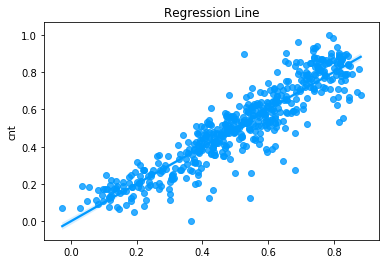

In [44]:
sns.regplot(y_train_pred,y_train,color = '#0099ff').set_title('Regression Line')
plt.show()

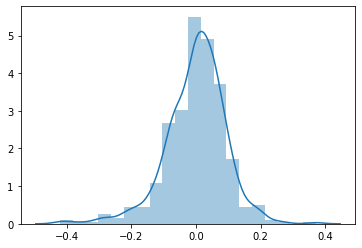

In [45]:
# Plotting Error Terms
sns.distplot((y_train - y_train_pred), bins = 20)
plt.show()

<h3>Applying the model on Test Data</h3>

In [46]:
# Create list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']
# fit on data 
bike_test[num_vars]=scaler.transform(bike_test[num_vars])
bike_test.head()

C:\Users\hp\Python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hp\Python\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Thu,Tue,Wed
184,0,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
535,1,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
299,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [47]:
# Data Preparation
rfe_col = ['yr','temp','hum','windspeed','spring','winter','Light Snow','Mist','Jul','Sep']

X_test = bike_test[rfe_col]
X_test = X_test.drop(['hum'], axis=1)
y_test = bike_test.cnt
X_test.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'Light Snow', 'Mist', 'Jul', 'Sep'], dtype='object')

In [48]:
# predict the test data
X_test_sm = sm.add_constant(X_test)

lr2= sm.OLS(y_test, X_test_sm)

lr_model = lr2.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     104.7
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           1.24e-72
Time:                        23:58:55   Log-Likelihood:                 209.58
No. Observations:                 220   AIC:                            -399.2
Df Residuals:                     210   BIC:                            -365.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2386      0.039      6.043      0.000       0.161       0.316
yr             0.2422      0.013     18.509      0.000       0.216       0.268
temp           0.4193      0.050      8.419      0.000       0.321       0.517
windspeed     -0.0384      0.043     -0.884      0.378      -0.124       0.047
spring        -0.1503      0.025     -5.983      0.000      -0.200      -0.101
winter         0.0556      0.020      2.721      0.007       0.015       0.096
Light Snow    -0.2407      0.041     -5.825      0.000      -0.322      -0.159
Mist          -0.0667      0.014     -4.730      0.000      -0.094      -0.039
Jul           -0.0512      0.025     -2.058      0.041      -0.100      -0.002
Sep            0.0337      0.024      1.398      0.164      -0.014       0.081
==============================================================================
Omnibus:                       25.722   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.195
Skew:                          -0.778   Prob(JB):                     6.19e-08
Kurtosis:                       4.096   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
y_test_pred = lr_model.predict(X_test_sm)

## R-Squared Value for Test Data

In [50]:
r2_score(y_test, y_test_pred)

0.8178079819435081

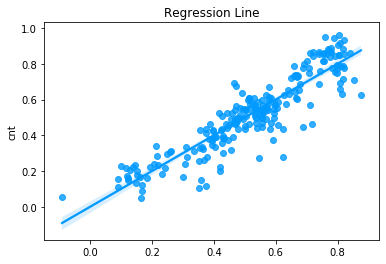

In [51]:
sns.regplot(y_test_pred,y_test,color = '#0099ff').set_title('Regression Line')
plt.show()

<Strong>R-Squared Value for Final Training Data - 0.827</Strong>
<br/>
<Strong>R-Squared Value for Final Test Data - 0.817</Strong>